In [6]:
from pydataset import data
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [8]:
df = data("tips")
df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


## One Sample T-Test Example (Compare a subgroup to the population)
- Business question - are tips on Sunday singifcantly diffrent that the rest of the days of the week?
- The null = no difference(tips are same on sunday as week)
- The alt hypo = there is a diff between sunday tips and the entire week

In [23]:
null_hypo = "Sunday tips are the same as the rest of the week"
alt_hypo = "Sunday tips are different than the rest of the weeks"
confidence_level = .95
alpha = 1 - confidence_level

In [24]:
sunday = df[df.day == "Sun"]
sunday.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

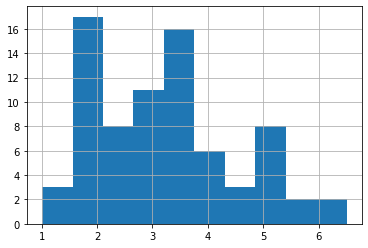

In [25]:
# Lets take a peek at the sunday tips
sunday.tip.hist()

<AxesSubplot:>

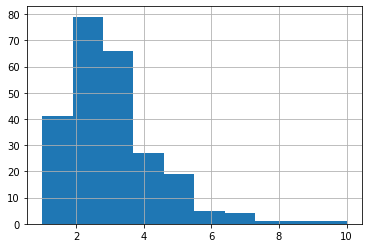

In [26]:
df.tip.hist()

In [27]:
# If you are doing a one-tailed test, use the ttest_1samp function
t, p = stats.ttest_1samp(sunday.tip, df.tip.mean())
p

0.0737884052452269

In [28]:
alpha

0.050000000000000044

In [32]:
if p < alpha:
    print("We reject the null hypothesis")
    print("We move forward with the alt hypo that", alt_hypo)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != accepting the null")

In [33]:
# Created funtion for easier use 
def hypo_result(p):
    if p < alpha:
        print("We reject the null hypothesis")
        print("We move forward with the alt hypo that", alt_hypo)
    else:
        print("We fail to reject the null hypothesis")
        print("Failing to reject the null != accepting the null")

In [34]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Exercises

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


Has the network latency gone up since we switched internet service providers

null_hypo = The internet latency has not changed since we switched internet service providers.
alt_hypo = There is a significant increase in network latency since we switched internet providers.
true_pos = latency went up after switching internet providers.
true_neg = latency went down after switching internet providers.
type_1 = after switching internet providers latency has not gone up 
type_2 = after switching internet providers the latency has gone down

Is the website redesign any good?

null_hypo = The website redesing has not changed the click through rate.
alt_hypo = The website redesign is generating a higher click through rate.
true_pos = Website redesign is good 
true_neg = Website redesign is bad
type_1 = before redesigning the website we find that there is better functionality
type_2 = after redesigning the website there has been no change in fucntionality 

Is our television ad driving more sales? (One tailed test > or = to null)

null_hypo = The television ad is not producing a singificant change in sales.
alt_hypo = Our teliviosn add is driving significantly more sales.
true_pos = tv ad driving more sales 
true_neg = tv ad not driving more sales
type_1 = without our tv ad we ared riving sales
type_2 = our tv ad is not driving any sales 

# T - Test 

In [36]:
df = data("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
saturday = df [df.day == "Sun"]

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [5]:
# Correlation Exercises 
import seaborn as sns

In [9]:
#1) Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What 
    # happens if you control for phone and internet service?
df = pd.read_csv('telco.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'telco.csv'

In [ ]:
df.head()

In [ ]:
df.info()

In [10]:
r, p = stats.pearsonr(df['tenure'], df['total_charges']+ 0 ).astype(float)

NameError: name 'df' is not defined

In [11]:
df.df.dropna()

NameError: name 'df' is not defined

In [ ]:
df = df[df.TotalCharges != 0]

In [ ]:
# Calculate tenure
ys = [df.monthly_charges, df.total_charges]
for y in ys:
    x = df['tenure']
    r, p = stats.pearsonr(x, y)
    print(f'Pearson Correlation is calucalted at {r:.3f} with a p value of {p:e}')
    if p < 0.05:
        print('p is below alpha and we can reject the null hypo')

In [12]:
# vizualize it 
sns.relplot(x = 'tenure', y = 'monthly_charges', hue = 'service_type', data = df)

NameError: name 'df' is not defined

In [13]:
df['internet_and_phone'] = df['internetservice'] + df['phoneservice']
df['phoneservice'] = 'phoneservice: ' + df['phoneservice']
df['internetservice'] = 'internetservice: ' + df['internetservice']

NameError: name 'df' is not defined

In [ ]:
# Better way to do question 1 
x = {}
y = {}
control = ['internetservice', 'phoneservice", 'internet_and_phone']
for cntrl in control:
           for val in df[cntrl].unique():
            x[val] = {}
            y{val} = {}
            x[val]['tenure'] = df['tenure'][df[cntrl] == val]
            y[val]['totalcharges'] = df['totalcharges'][df[cntrl] == val]
            y[val]['monthlycharges'] = df['monthlycharges'][df[cntrl] == val]

In [ ]:
x['internet service: DSL'].keys()

In [ ]:
for key y:
    print('For customers with {key}: ')
    for subkey in y[key]:
        print('For an x of tenure and a y of {subkey}: ')
        r, p = stats.pearsonr(x[key]['tenure'], y[key][subkey])
        print(f'Pearson Correlation is calucalted at {r:.3f} with a p value of {p:e}')
        if p < 0.05:
            print('p is below alpha and we can reject the null hypo')
        pltt.title(f'For an x of tenure and a y of {subkey} under the control of {key}, r={r:.3f}')
        pltt.scatter(x[key]['tenure'], y[key][subkey])
        plt.show()
        plt.clf()
        print('-------------------------------')
        print('-------------------------------')
        print('-------------------------------')

In [14]:
#2) Use the employees database.
from env import user,password,host
from sqlalchemy import create_engine
def get_connection(db, user, host, password):
    url = f'mysq;+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

ModuleNotFoundError: No module named 'env'

In [ ]:
db = employees
query1 = 'Select * From employees'
query2 = 'Select * From salaries'
query3 = 'Select * From titles'

In [ ]:
conn = get_conection('employees', user, host, password)
employees = pd.read_sql(query1, conn)
salaries = pd.read_sql(query2, conn)
titles = pd.read_sql(query3, conn)

In [ ]:
countref = titles.groupby('emp_no').count()[['title']].rename(columns={'title': 'titelcount'})

In [ ]:
merge = pd.merge(titles, countref, how = 'left', on= 'emp_no')
merge.info()

In [ ]:
merge['to_date'] = merge['to_date'].apply(lambda x: pd.datatime.now() if str(x).startswith('9999') esle pd.to_datetime(x))       

In [ ]:
merge['from_date'] = merge['from_date'].apply(lambda x: pd.datatime.now() if str(x).startswith('9999') esle pd.to_datetime(x))       

In [15]:
merge['tenure'] = (merge.to_date - merge.from_date).astype(int)

NameError: name 'merge' is not defined

In [ ]:
merge = pd.merge(employees, merge, how='left', on= 'emp_no')

In [ ]:
merge = pd.merge(merge, salaries, how='left', on= 'emp_no')

In [ ]:
#a)Is there a relationship between how long an employee has been with the company and their salary?
merge.isnull().values.any() # Needs to be false

In [ ]:
r, p = stats.pearsonr(merge,['tenure'], merge['salary'])
print(f'Pearson Correlation is calucalted at {r:.3f} with a p value of {p:e}')
if p < 0.05:
    print('p is below alpha and we can reject the null hypo')

In [ ]:
plt.scatter(merge['tenure'], merge['salary'])

In [ ]:
#b)s there a relationship between how long an employee has been with the company and the number of titles they have had?
r, p = stats.pearsonr(merge,['tenure'], merge['titlecount'])
print(f'Pearson Correlation is calucalted at {r:.3f} with a p value of {p:e}')
if p < 0.05:
    print('p is below alpha and we can reject the null hypo')

In [ ]:
plt.scatter(merge['tenure'], merge['titlecount'])

In [18]:
#3) Use the sleepstudy data. Is there a relationship between days and reaction time?
df = data('sleepstudy')
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [20]:
r, p = stats.pearsonr(df['Days'], df['Reaction'])
print(r)

0.5352302262650253


In [21]:
print(p)

9.894096322214812e-15


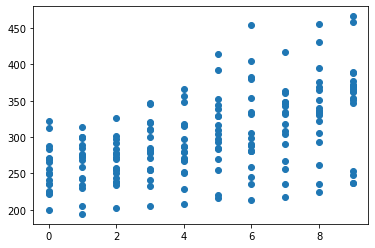

In [22]:
plt.scatter(df['Days'], df['Reaction'])

In [28]:
# Seperate by subject
x = {}
y = {}
control = ['Subject']
for cntrl in control:
    for val in df[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['Days'] = df['Days'][df[cntrl] == val]
        y[val]['Reaction'] = df['Reaction'][df[cntrl] == val]
            

In [36]:
corr= {}
for key y:
    print('For subject number {key}: ')
    print('For an x of tenure and a y of reaction time: ')
    r, p = stats.pearsonr(x[key]['Days'], y[key]['Reaction'])
    print(f'Pearson Correlation is calucalted at {r:.3f} with a p value of {p:e}')
    if p < 0.05:
        print('p is below alpha and we can reject the null hypo')
    pltt.title(f'For an x of tenure and a y of {subkey} under the control of {key}, r={r:.3f}')
    pltt.scatter(x[key]['Days'], y[key]['Reaction'])
    plt.show()
    plt.clf()
    print('-------------------------------')
    print('-------------------------------')
    print('-------------------------------')

SyntaxError: invalid syntax (<ipython-input-36-11d9f78902f5>, line 2)